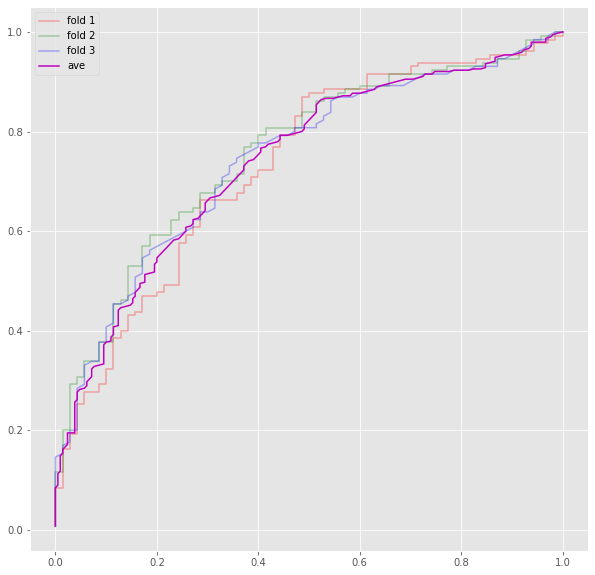

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ROC.csv')
df['actual'] = df['actual'].apply(lambda x: 1 if x=="P" else 0)
df['actual.1'] = df['actual.1'].apply(lambda x: 1 if x=="P" else 0)
df['actual.2'] = df['actual.2'].apply(lambda x: 1 if x=="P" else 0)

p_number = 130
n_number = 70
roc_record = np.empty((3,200,2))
for i,k in enumerate(['actual', 'actual.1', 'actual.2']) :
    for t in range(1, 201): # 200 個 threshold
        tp = df[k][:t].sum()
        fp = t - tp
        roc_record[i,t-1,0] = fp/n_number
        roc_record[i,t-1,1] = tp/p_number
        
plt.figure(figsize = (10,10))
plt.plot(roc_record[0,:,0], roc_record[0,:,1], c='r', label="fold 1", alpha=0.3)
plt.plot(roc_record[1,:,0], roc_record[1,:,1], c='g', label="fold 2", alpha=0.3)
plt.plot(roc_record[2,:,0], roc_record[1,:,1], c='b', label="fold 3", alpha=0.3)
plt.plot(roc_record[:,:,0].mean(axis=0), roc_record[:,:,1].mean(axis=0), c='m', label="ave")
plt.legend()
plt.show()